# Exploración de Datos

In [1]:
#Acceder a los datos del repositorio
!git clone https://github.com/Diego99021999/Proyecto_Deep_Learning_Diego_Lopez
!pip install git+https://github.com/manu-mannattil/nolitsa.git

Cloning into 'Proyecto_Deep_Learning_Diego_Lopez'...
remote: Enumerating objects: 459, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 459 (delta 2), reused 6 (delta 2), pack-reused 453
Receiving objects: 100% (459/459), 390.33 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (103/103), done.
Updating files: 100% (401/401), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-ba9ibvrv
  Running command git clone --filter=blob:none --quiet https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-ba9ibvrv
  Resolved https://github.com/manu-mannattil/nolitsa.git to commit 0e3cfd59c82c21c42da55cd24ee944b44aa0d9ad
  Preparing metadata (setup.py) ... done
  Created wheel for nolitsa: filename=nolitsa-0.1-py3-none-any.whl size=22185 sha256=1538f4936b3e22dba7e0990c57b9977f449ada3017d213520b779f669

In [2]:
from scipy.io import wavfile
import random
import librosa, librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [3]:
#Ruta base de datos
ruta_audios = "/content/Proyecto_Deep_Learning_Diego_Lopez/local/DBPD_pataka"

In [4]:
# Get list of filenames
files = [f for f in listdir(ruta_audios) if (isfile(join(ruta_audios, f)))]
for i in range(len(files)):
    files[i] = ruta_audios + "/" + files[i]

# Representación grafica de las señales en el tiempo

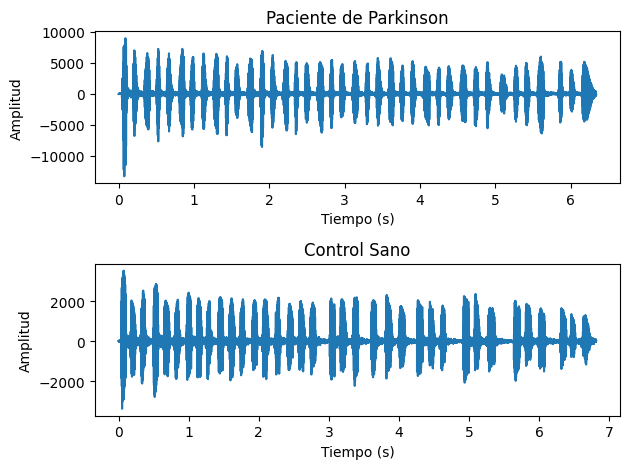

In [5]:
samplerate, dataHC = wavfile.read(files[3])
t_HC = np.arange(len(dataHC))/samplerate
samplerate, dataPD = wavfile.read(files[150])
t_PD = np.arange(len(dataPD))/samplerate

fig, axs = plt.subplots(2)

axs[0].plot(t_HC,dataHC)
axs[0].set_title('Paciente de Parkinson')
axs[0].set_ylabel('Amplitud')
axs[0].set_xlabel('Tiempo (s)')

axs[1].plot(t_PD,dataPD)
axs[1].set_title('Control Sano')
axs[1].set_ylabel('Amplitud')
axs[1].set_xlabel('Tiempo (s)')
plt.tight_layout()

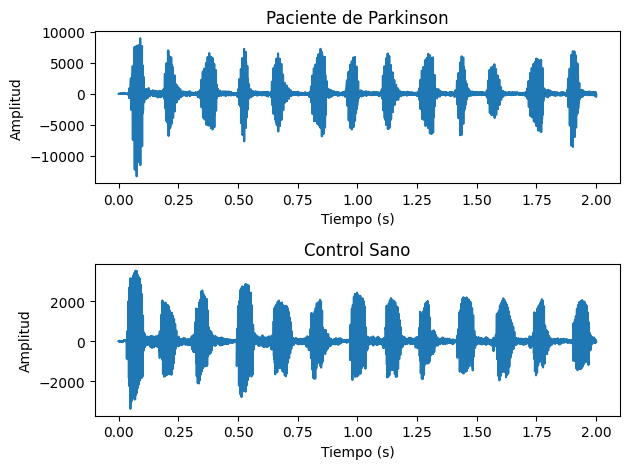

In [6]:
fig, axs = plt.subplots(2)

axs[0].plot(t_HC[:samplerate*2],dataHC[:samplerate*2])
axs[0].set_title('Paciente de Parkinson')
axs[0].set_ylabel('Amplitud')
axs[0].set_xlabel('Tiempo (s)')

axs[1].plot(t_PD[:samplerate*2],dataPD[:samplerate*2])
axs[1].set_title('Control Sano')
axs[1].set_ylabel('Amplitud')
axs[1].set_xlabel('Tiempo (s)')
plt.tight_layout()
plt.show()

# Extracción de Espectrogramas
# Representación en Frecuencia de señales

In [7]:
def normalize1D(signal):
  if len(signal.shape) > 1:                    #Para señales con dos canales
    signal = np.mean(signal,axis=1)

  signal = signal - np.mean(signal)
  signal = signal/(np.max(np.abs(signal)))
  return signal

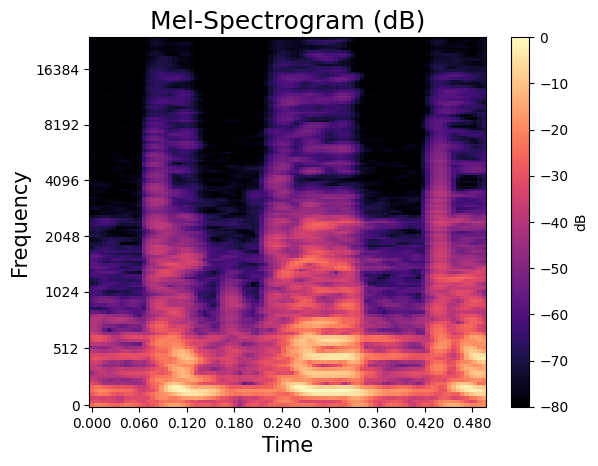

In [8]:
#Segmentar audios y calcular espectrogramas por segmentos de 500ms

for i in range(len(files)//2):

  hists = []
  fs, x = wavfile.read(files[2*i])
  x = normalize1D(x)

  hop_length =  264 # amount of samples we are shifting after each fft
  n_fft = 2048     # number of samples in a window per fft

  for j in range(len(x)//(fs//2)):
    x1 = x[j*(fs//2): (j+1)*(fs//2)]
    mel_signal = librosa.feature.melspectrogram(y=x1, sr=fs, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    hists.append(power_to_db)

  fs, x = wavfile.read(files[2*i+1])
  x = normalize1D(x)

  for j in range(len(x)//(fs//2)):
    x1 = x[j*(fs//2): (j+1)*(fs//2)]
    mel_signal = librosa.feature.melspectrogram(y=x1, sr=fs, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    hists.append(power_to_db)

  # Graficar espectrograma
  plt.figure()
  librosa.display.specshow(power_to_db, sr=fs, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
  plt.colorbar(label='dB')
  plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
  plt.xlabel('Time', fontdict=dict(size=15))
  plt.ylabel('Frequency', fontdict=dict(size=15))
  plt.show()
  break

In [9]:
import pickle

# Normalizar arreglo
def normalize(images):
  norm = np.abs(images)
  norm -= norm.min()
  norm = norm/norm.max()
  return norm

#Extraer imagenes guardadas
def get_images(filenames, labels):

  all_images = []
  all_labels = []

  for (i, file) in enumerate(filenames):
    with open(file, 'rb') as f:
      lista = pickle.load(f)

    all_images += lista
    all_labels.append(labels[i]*np.ones(len(lista)))

  return normalize(np.expand_dims(np.array(all_images), axis = 3)), normalize(np.hstack(all_labels))

# Shuffle 2 arreglos
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

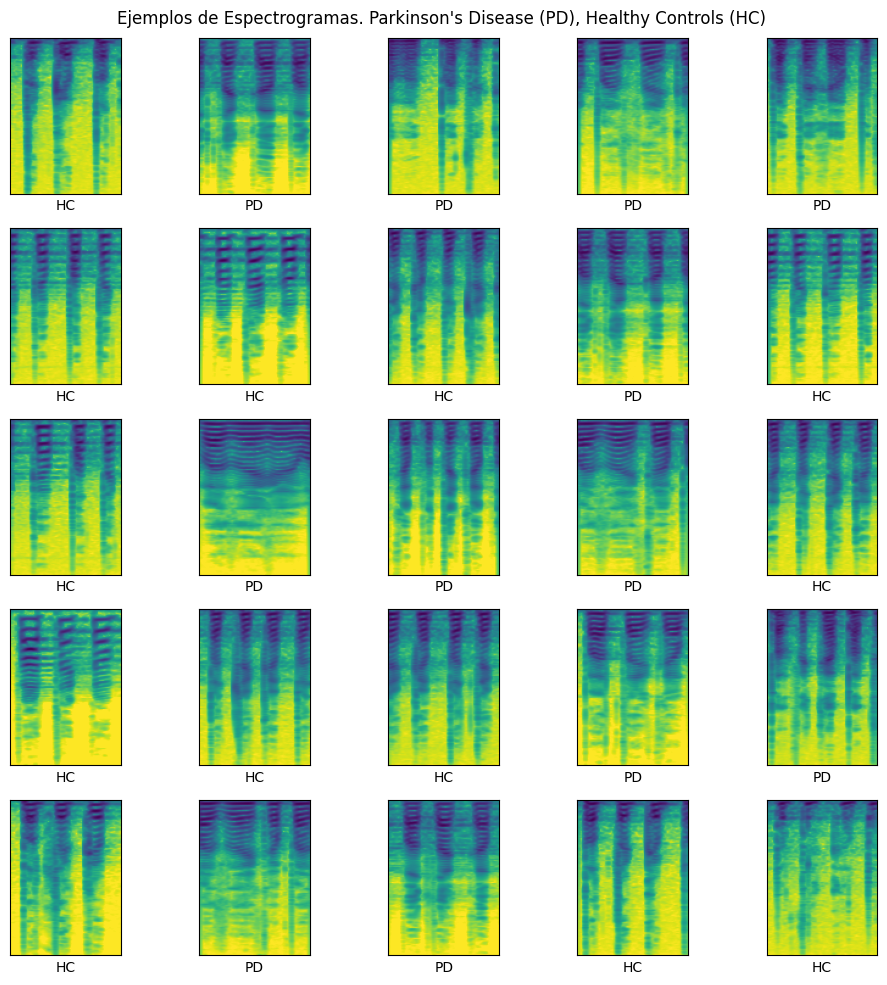

In [10]:
# Plot example spectrograms
ruta_specs = "/content/Proyecto_Deep_Learning_Diego_Lopez/local/spectrograms"

# Get list of filenames
labels = []
files = [f for f in listdir(ruta_specs) if (isfile(join(ruta_specs, f)))]
random.shuffle(files)
for i in range(len(files)):
    files[i] = ruta_specs + "/" + files[i]
    labels.append(0 if 'HC' in files[i] else 1)
labels = np.array(labels)
files = np.array(files)

images, labels = get_images(files[:10], labels[:10])
images, labels = unison_shuffled_copies(images, labels)

class_names = ['HC', 'PD']
plt.figure(figsize=(10,10))
plt.suptitle("Ejemplos de Espectrogramas. Parkinson's Disease (PD), Healthy Controls (HC) ")

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(class_names[int(labels[i])])
plt.tight_layout()
plt.show()

# Extracción de atractores
# Representación en el espacio de fase

In [11]:
from nolitsa import dimension, delay

def phase_embeding(x,n=2,t=1):
  embed = np.array([x[0:len(x) - t*(n-1)]])                               #
  for i in range(1, n):
        embed = np.append(embed, [x[i*t:len(x) - t*(n -1 - i)]], axis=0)  #
  return embed.T

def find_optimal_delay(x, maxtau=50):
  mi = delay.dmi(x, maxtau=maxtau)
  diffmi = np.diff(mi)
  return np.where(diffmi > 0)[0][0]

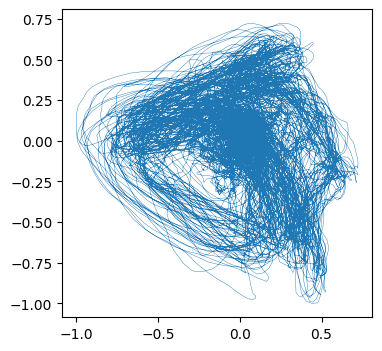

In [12]:
# Get list of filenames
files = [f for f in listdir(ruta_audios) if (isfile(join(ruta_audios, f)))]
for i in range(len(files)):
    files[i] = ruta_audios + "/" + files[i]

#Segmentar audios y calcular atractores por segmentos de 500ms
for i in range(len(files)//2):

  phases = []
  fs, x = wavfile.read(files[2*i])
  x = normalize1D(x)

  #mini = find_optimal_delay(x, maxtau=200)
  mini = 60


  for j in range(len(x)//fs):
    x1 = x[j*fs: (j+1)*fs]

    emb = phase_embeding(x1, 2, mini)

    plt.figure(figsize = (4,4))
    plt.plot(emb[:, 0],emb[:, 1],  linewidth = 0.3)
    plt.savefig("./hola.png")

    a = plt.imread("./hola.png")
    b = np.mean(a, axis = 2)[50:-50,55:-50]
    b = b-b.min()
    b = b/b.max()
    phases.append(b)

    break
  break

  fs, x = wavfile.read(files[2*i+1])
  x = normalize1D(x)
  mini = find_optimal_delay(x, maxtau=200)
  for j in range(len(x)//(fs//2)):
    x1 = x[j*(fs//2): (j+1)*(fs//2)]

    emb = phase_embeding(x1, 2, mini)

    plt.figure(figsize = (4,4))
    plt.plot(emb[:, 0],emb[:, 1],  linewidth = 0.3)
    plt.savefig("./hola.png")

    a = plt.imread("./hola.png")
    b = np.mean(a, axis = 2)[50:-50,55:-50]
    b = b-b.min()
    b = b/b.max()
    phases.append(b)



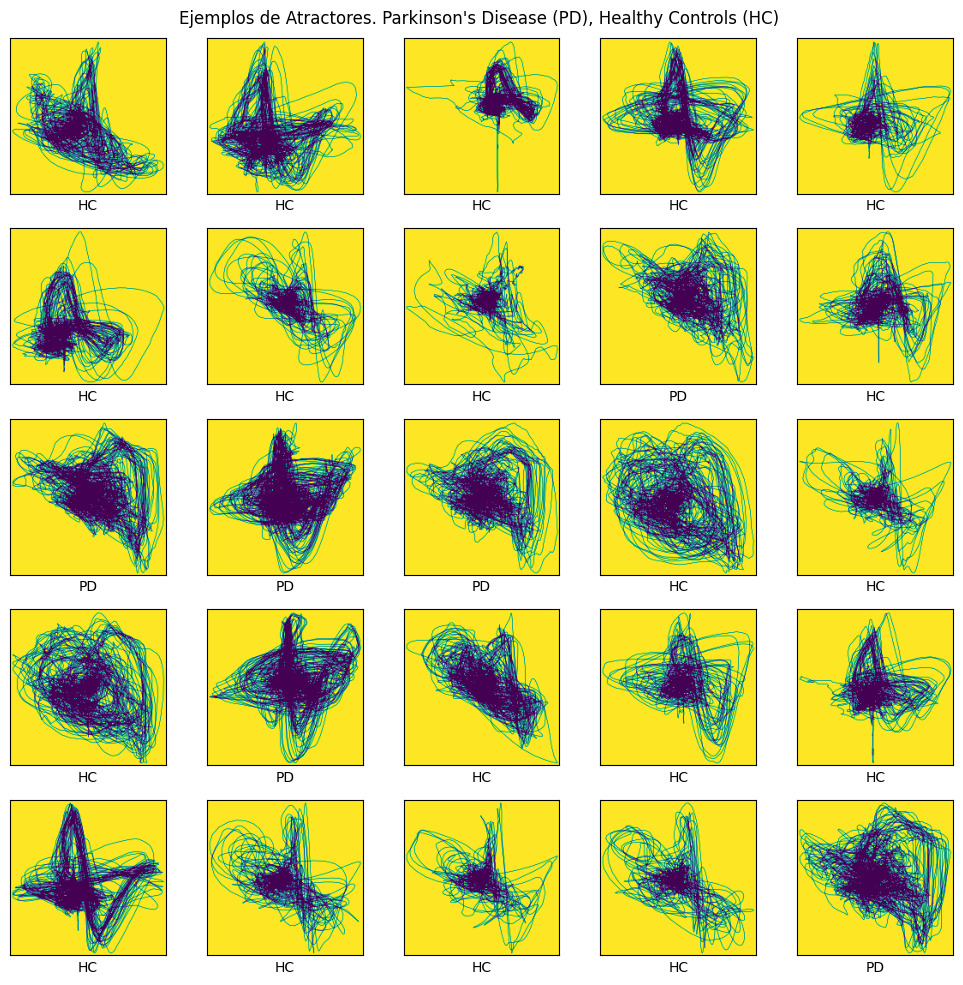

In [13]:
# Plot example spectrograms
ruta_specs = "/content/Proyecto_Deep_Learning_Diego_Lopez/local/attractors"

# Get list of filenames
labels = []
files = [f for f in listdir(ruta_specs) if (isfile(join(ruta_specs, f)))]
random.shuffle(files)
for i in range(len(files)):
    files[i] = ruta_specs + "/" + files[i]
    labels.append(0 if 'HC' in files[i] else 1)
labels = np.array(labels)
files = np.array(files)

images, labels = get_images(files[:10], labels[:10])
images, labels = unison_shuffled_copies(images, labels)

class_names = ['HC', 'PD']
plt.figure(figsize=(10,10))
plt.suptitle("Ejemplos de Atractores. Parkinson's Disease (PD), Healthy Controls (HC) ")

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(class_names[int(labels[i])])
plt.tight_layout()
plt.show()